<div style="text-align: center;">
  <h2>Autor: William Nabhan Filho</h2>
</div>

## 1. Importando Bibliotecas e Módulos

In [1]:
import os, sys

sys.path.append(os.path.abspath('..'))

from src.marketing_strategies_utils import filtrar_por_cluster_e_aisles, score_produtos_por_aisle_xlsx

import pandas as pd

## 2. Preparação dos dados

In [2]:
data = pd.read_parquet('../data/processed/data.parquet')

In [3]:
user_id_clusters = pd.read_csv('../results/user_id_clusters.csv')

In [4]:
# Fazendo o merge do DataFrame original com os clusters
data_com_cluster = data.merge(user_id_clusters, on='user_id', how='left')

## 3. Revisão das Regras de Associação Selecionadas

### 3.1 Regras - Cluster 0

**`Antecedents` → `Consequents`**: (support; confidence; lift)

`milk`, `fresh fruits`, `fresh vegetables` → `yogurt`, `packaged cheese`: (0,028; 0,283; 2,346)  
`fresh fruits`, `packaged cheese` → `yogurt`, `fresh vegetables`: (0,056; 0,303; 1,927)   
`chips pretzels`, `fresh vegetables` → `fresh fruits`, `packaged vegetables fruits`: (0,045; 0,446; 1,806)  
`milk`, `frozen produce` → `yogurt`: (0,025; 0,523; 1,560)  

### 3.2 Regras - Cluster 1

**`Antecedents` → `Consequents`**: (support; confidence; lift)

`packaged cheese`, `yogurt` → `milk`, `fresh vegetables`: (0,026; 0,350; 2,098)  
`milk`, `fresh vegetables` → `fresh fruits`, `packaged cheese`: (0,049; 0,293; 1,702)  
`milk, fresh herbs` → `fresh fruits`, `fresh vegetables`: (0,034; 0,795; 1,531)  
`fresh fruits`, `soy lactosefree` → `packaged vegetables fruits`, `fresh vegetables`; (0,075; 0,541; 1,414)  

### 3.3 Regras - Cluster 2

**`Antecedents` → `Consequents`**: (support; confidence; lift)
  
`nuts seeds dried fruit` → `energy granola bars`: (0,025; 0,250; 1,824)  
`cookies cakes` → `chips pretzels`: (0,043; 0,399; 1,728)  
`crackers` → `chips pretzels`: (0,056; 0,390; 1,689)  
`refrigerated` → `juice nectars`: (0,045; 0,224; 1,646)  

## 4. Sistemas de Recomendação

Com os perfis dos usuários bem definidos e as fortes regras de associação selecionadas para cada cluster, foram criados sistemas de recomendação estratégicos para impulsionar vendas cruzadas com base no carrinho digital do usuário e seu grupo.

### 4.1 Sistema de Recomendação - Cluster 0

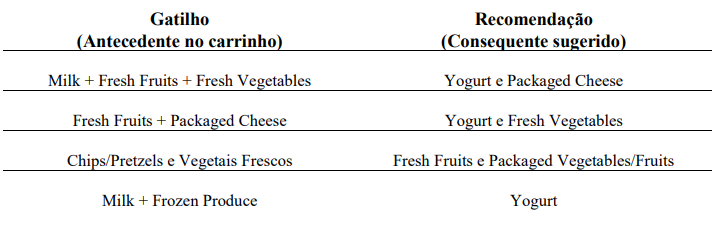

### 4.2 Sistema de Recomendação - Cluster 1

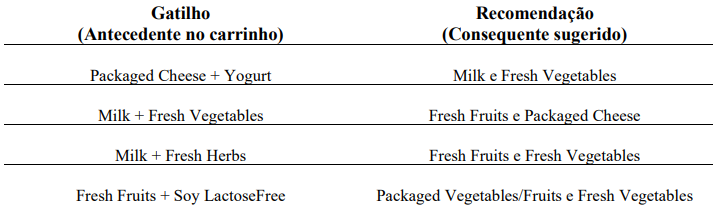

### 4.3 Sistema de Recomendação - Cluster 2

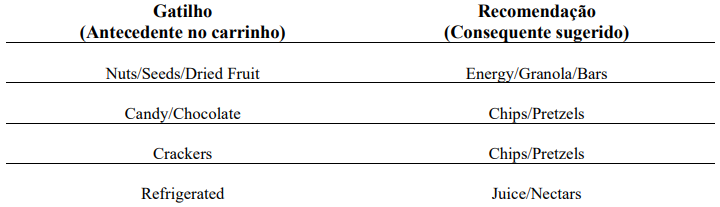

## 5. Listas Personalizadas de Produtos por Cluster

Combinada ao sistema de recomendação, uma seção “Para Você”, contendo uma ordenação inteligente de produtos também contribui para impulsionar as vendas. Essa ordenação considera as seções mais populares dentro dos departamentos mais representativos de cada grupo de clientes. Para isso, foram selecionadas as três seções mais populares de cada departamento.

### 5.1 Seções populares

#### 5.1.1 Cluster 0

Departamentos mais representativos: `dairy eggs`, `produce`, `frozen` e `sncaks`.

In [5]:
data_com_cluster[(data_com_cluster['cluster'] == 0) & (data_com_cluster['department'] == 'dairy eggs')]['aisle'].value_counts().head(3)

yogurt             142936
packaged cheese     93504
milk                81342
Name: aisle, dtype: int64

In [6]:
data_com_cluster[(data_com_cluster['cluster'] == 0) & (data_com_cluster['department'] == 'produce')]['aisle'].value_counts().head(3)

fresh fruits                  233429
fresh vegetables              192211
packaged vegetables fruits    121942
Name: aisle, dtype: int64

In [7]:
data_com_cluster[(data_com_cluster['cluster'] == 0) & (data_com_cluster['department'] == 'frozen')]['aisle'].value_counts().head(3)

ice cream ice     49549
frozen produce    45537
frozen meals      41798
Name: aisle, dtype: int64

In [8]:
data_com_cluster[(data_com_cluster['cluster'] == 0) & (data_com_cluster['department'] == 'snacks')]['aisle'].value_counts().head(3)

chips pretzels         65041
crackers               42625
energy granola bars    38037
Name: aisle, dtype: int64

#### 5.1.2 Cluster 1

Departamentos mais representativos: `produce` e `dairy eggs`.

In [9]:
data_com_cluster[(data_com_cluster['cluster'] == 1) & (data_com_cluster['department'] == 'produce')]['aisle'].value_counts().head(3)

fresh vegetables              323538
fresh fruits                  300616
packaged vegetables fruits    142056
Name: aisle, dtype: int64

In [10]:
data_com_cluster[(data_com_cluster['cluster'] == 1) & (data_com_cluster['department'] == 'dairy eggs')]['aisle'].value_counts().head(3)

yogurt             63888
packaged cheese    47264
milk               45446
Name: aisle, dtype: int64

#### 5.1.3 Cluster 2

Departamentos mais representativos: `beverages` e `snacks`.

In [11]:
data_com_cluster[(data_com_cluster['cluster'] == 2) & (data_com_cluster['department'] == 'beverages')]['aisle'].value_counts().head(3)

water seltzer sparkling water    42572
soft drinks                      21765
refrigerated                     18803
Name: aisle, dtype: int64

In [12]:
data_com_cluster[(data_com_cluster['cluster'] == 2) & (data_com_cluster['department'] == 'snacks')]['aisle'].value_counts().head(3)

chips pretzels         20148
energy granola bars    15899
candy chocolate        12042
Name: aisle, dtype: int64

### 5.2 Filtragem dos Dados

In [13]:
#Filtrando os dados partir das 3 seções mais populares de cada departamento para cada cluster.
aisle_filtros = {
    0: ['fresh fruits', 'fresh vegetables', 'packaged vegetables fruits', 'packaged cheese', 'milk', 'yogurt', 
        'frozen produce', 'frozen meals', 'ice cream ice', 'chips pretzels', 'crackers', 'energy granola bars'],
    1: ['fresh vegetables', 'fresh fruits', 'packaged vegetables fruits', 'yogurt', 'packaged cheese', 'milk'],
    2: ['water seltzer sparkling water', 'soft drinks', 'refrigerated', 'chips pretzels', 'energy granola bars','candy chocolate'],
}

data_cluster_0, data_cluster_1, data_cluster_2 = filtrar_por_cluster_e_aisles(data_com_cluster, aisle_filtros=aisle_filtros)

### 5.3 Score de Produtos

Para ordenação de produtos por seção, foi utilizado um score que combina a proporção de compras de cada produto em sua respectiva seção ('aisle') com sua taxa média de recompra, seguindo a fórmula: score = proporcao × (taxa de recompra)² × 1000.   
A elevação ao quadrado da taxa de recompra foi utilizada para ampliar o peso da fidelidade do consumidor, priorizando produtos que, além de **populares em volume**, apresentam **alto índice de recorrência**.    
Com isso, valorizam-se produtos que proporcionam uma **experiência positiva**, e geram **retornos consistentes**, sendo ao mesmo tempo relevantes em **frequência** e **retenção**.  
Com os scores calculados para os produtos das seções selecionadas, é possível ordená-los de forma decrescente, gerando listas personalizadas por seção de produtos. Assim, ao entrar em uma dessas seções de produtos, o cliente se depara inicialmente aos produtos **mais relevantes** para o seu perfil de consumo.

In [14]:
# Atribuindo Dataframes e Exportando dados em excel para análise interativa
score_produtos_por_aisles_cluster_0 = score_produtos_por_aisle_xlsx(data_cluster_0, '../results/score_produtos_por_aisle_cluster_0.xlsx')
score_produtos_por_aisles_cluster_1 = score_produtos_por_aisle_xlsx(data_cluster_1, '../results/score_produtos_por_aisle_cluster_1.xlsx')
score_produtos_por_aisles_cluster_2 = score_produtos_por_aisle_xlsx(data_cluster_2, '../results/score_produtos_por_aisle_cluster_2.xlsx')

### 5.4 Exemplos de Listas Personalizadas

#### 5.4.1 Cluster 0

In [15]:
score_produtos_por_aisles_cluster_0[score_produtos_por_aisles_cluster_0['aisle'] == 'chips pretzels'].sort_values('score', ascending=False).head(10)

,aisle,product_name,count,taxa_recompra,proporcao,score
348,chips pretzels,Lightly Salted Baked Snap Pea Crisps,2575,0.662913,0.039590,17.398131
144,chips pretzels,Corn Chips,841,0.780024,0.012930,7.867278
695,chips pretzels,Sea Salt Pita Chips,1343,0.611318,0.020649,7.716549
7,chips pretzels,Aged White Cheddar Baked Rice & Corn Puffs Glu...,1053,0.683761,0.016190,7.569190
677,chips pretzels,Sea Salt & Vinegar Potato Chips,1231,0.614947,0.018927,7.157255
696,chips pretzels,Sea Salt Potato Chips,1160,0.628448,0.017835,7.043846
571,chips pretzels,Pretzel Crisps Original Deli Style Pretzel Cra...,1363,0.570800,0.020956,6.827727
841,chips pretzels,Veggie Chips,811,0.700370,0.012469,6.116298
787,chips pretzels,Thin & Light Tortilla Chips,848,0.672170,0.013038,5.890697
458,chips pretzels,Organic Tortilla Chips,833,0.651861,0.012807,5.442112


In [16]:
score_produtos_por_aisles_cluster_0[score_produtos_por_aisles_cluster_0['aisle'] == 'yogurt'].sort_values('score', ascending=False).head(10)

,aisle,product_name,count,taxa_recompra,proporcao,score
7608,yogurt,Total 2% with Strawberry Lowfat Greek Strained...,2830,0.772085,0.019799,11.802522
7589,yogurt,Total 0% Nonfat Greek Yogurt,2405,0.732640,0.016826,9.031401
7602,yogurt,Total 2% Lowfat Greek Strained Yogurt With Blu...,2049,0.783797,0.014335,8.806584
7603,yogurt,Total 2% Lowfat Greek Strained Yogurt with Peach,2049,0.782333,0.014335,8.773714
7096,yogurt,Icelandic Style Skyr Blueberry Non-fat Yogurt,2034,0.783186,0.014230,8.728487
7230,yogurt,Non Fat Raspberry Yogurt,1825,0.803288,0.012768,8.238790
7600,yogurt,Total 2% Greek Strained Yogurt with Cherry 5.3 oz,1915,0.780679,0.013398,8.165297
7588,yogurt,Total 0% Greek Yogurt,2174,0.723551,0.015210,7.962625
7595,yogurt,Total 2% All Natural Greek Strained Yogurt wit...,1993,0.738585,0.013943,7.606182
7609,yogurt,Total Greek Strained Yogurt,1990,0.711055,0.013922,7.039117


#### 5.4.2 Cluster 1

In [17]:
score_produtos_por_aisles_cluster_1[score_produtos_por_aisles_cluster_1['aisle'] == 'yogurt'].sort_values('score', ascending=False).head(10)

,aisle,product_name,count,taxa_recompra,proporcao,score
2674,yogurt,Total Greek Strained Yogurt,1917,0.684924,0.030006,14.076285
2653,yogurt,Total 0% Greek Yogurt,1815,0.689807,0.028409,13.518009
2654,yogurt,Total 0% Nonfat Greek Yogurt,1808,0.684735,0.028300,13.268553
2673,yogurt,Total 2% with Strawberry Lowfat Greek Strained...,1333,0.718680,0.020865,10.776595
2725,yogurt,Whole Milk Plain Yogurt,1293,0.726991,0.020239,10.696406
2496,yogurt,Organic Plain Whole Milk Yogurt,993,0.784491,0.015543,9.565471
2661,yogurt,Total 2% All Natural Low Fat 2% Milkfat Greek ...,1161,0.715762,0.018172,9.310018
2668,yogurt,Total 2% Lowfat Greek Strained Yogurt with Peach,961,0.742976,0.015042,8.303358
2743,yogurt,Yobaby Organic Plain Yogurt,719,0.826147,0.011254,7.681123
2571,yogurt,Plain Greek Yogurt,774,0.784238,0.012115,7.451044


In [18]:
score_produtos_por_aisles_cluster_1[score_produtos_por_aisles_cluster_1['aisle'] == 'fresh fruits'].sort_values('score', ascending=False).head(10)

,aisle,product_name,count,taxa_recompra,proporcao,score
23,fresh fruits,Banana,31469,0.858909,0.104682,77.226246
21,fresh fruits,Bag of Organic Bananas,30381,0.848524,0.101062,72.764236
249,fresh fruits,Organic Strawberries,22685,0.798104,0.075462,48.066908
212,fresh fruits,Organic Hass Avocado,18834,0.820803,0.062651,42.209299
181,fresh fruits,Organic Avocado,16226,0.786269,0.053976,33.368880
135,fresh fruits,Large Lemon,13836,0.734244,0.046025,24.813000
140,fresh fruits,Limes,13326,0.720696,0.044329,23.024616
315,fresh fruits,Strawberries,10785,0.725545,0.035876,18.885846
3,fresh fruits,Apple Honeycrisp Organic,7312,0.752735,0.024323,13.781884
219,fresh fruits,Organic Lemon,7795,0.718409,0.025930,13.382826


#### 5.4.2 Cluster 2

In [19]:
score_produtos_por_aisles_cluster_2[score_produtos_por_aisles_cluster_2['aisle'] == 'chips pretzels'].sort_values('score', ascending=False).head(10)

,aisle,product_name,count,taxa_recompra,proporcao,score
1099,chips pretzels,Organic Simply Naked Pita Chips,507,0.747535,0.025164,14.061722
1103,chips pretzels,Organic Tortilla Chips,452,0.672566,0.022434,10.147914
1025,chips pretzels,Lightly Salted Baked Snap Pea Crisps,468,0.636752,0.023228,9.417914
890,chips pretzels,Dark Chocolate Pretzels with Sea Salt,337,0.747774,0.016726,9.352748
1210,chips pretzels,Pub Mix,318,0.767296,0.015783,9.292244
1273,chips pretzels,Sea Salt & Vinegar Potato Chips,367,0.653951,0.018215,7.789767
767,chips pretzels,Backyard Barbeque Potato Chips,285,0.701754,0.014145,6.965995
1250,chips pretzels,Salt & Pepper Krinkle Chips,266,0.706767,0.013202,6.594807
1198,chips pretzels,Pretzel Crisps Original Deli Style Pretzel Cra...,324,0.620370,0.016081,6.188924
1287,chips pretzels,Sea Salt Pita Chips,265,0.675472,0.013153,6.001064


In [20]:
score_produtos_por_aisles_cluster_2[score_produtos_por_aisles_cluster_2['aisle'] == 'refrigerated'].sort_values('score', ascending=False).head(10)

,aisle,product_name,count,taxa_recompra,proporcao,score
2027,refrigerated,100% Raw Coconut Water,841,0.833532,0.044727,31.075126
2347,refrigerated,Organic Raw Kombucha Gingerade,788,0.836294,0.041908,29.310111
2488,refrigerated,Trilogy Kombucha Drink,651,0.814132,0.034622,22.947935
2230,refrigerated,Lemonade,597,0.668342,0.031750,14.182223
2143,refrigerated,Enlightened Organic Raw Kombucha,358,0.851955,0.019040,13.819410
2476,refrigerated,Synergy Organic Kombucha Gingerberry,389,0.807198,0.020688,13.479772
2379,refrigerated,Original Orange Juice,612,0.632353,0.032548,13.014976
2425,refrigerated,Pulp Free Orange Juice,394,0.713198,0.020954,10.658333
2376,refrigerated,Original No Pulp 100% Florida Orange Juice,450,0.644444,0.023932,9.939312
2217,refrigerated,"Kombucha, Organic Raw, Citrus",253,0.794466,0.013455,8.492674


Observa-se que, para diferentes grupos de clientes, uma mesma seção de produtos apresenta uma ordenação distinta dos itens por relevância, refletindo as preferências específicas de cada perfil. Essa personalização é essencial para aumentar a **efetividade das recomendações**, direcionando a atenção do cliente para os produtos mais alinhados ao seu comportamento de compra e, consequentemente, potencializando **conversões** e **fidelização**, além de aprimorar a **experiência** e o **engajamento** dos usuários com o ambiente de compra digital.

## 6. Campanhas e Promoções por Clusters

Uma outra estratégia de vendas é a criação de campanhas e promoções direcionadas às seções de produtos destacadas nas regras selecionadas para cada cluster.

**Cluster 0**: Consumidores variados (famílias)
- **Foco**: Laticínios, produtos frescos, congelados e snacks.
- **Estratégia**: Promoções de kits familiares com laticínios, vegetais frescos e alimentos congelados, destacando praticidade para refeições caseiras, além de snacks para momentos de lazer.   
    Campanhas podem incluir receitas práticas para famílias, com destaque para ovos, iogurtes e vegetais prontos para cozinhar.

**Cluster 1**: Consumidores focados em saúde (indivíduos preocupados com nutrição) 
- **Foco**: Produtos frescos e laticínios.
- **Estratégia**: Campanhas voltadas à alimentação saudável, promovendo cestas com vegetais frescos e laticínios ricos em proteínas (ex.: queijos magros, ovos orgânicos).  
   Materiais como e-books de receitas saudáveis e nutritivas podem podem ajudar no engajamento. 

**Cluster 2**: Consumidores que buscam praticidade (jovens ou pessoas ativas)
- **Foco**: Bebidas não alcoólicas e snacks.
- **Estratégia**:Ofertas de combos prontos para consumo, ideais para rotina de trabalho/estudos.   
    Campanhas descontraídas nas redes sociais, com foco em praticidade e estilo de vida jovem. 
